# Power Law for City Sizes

In this notebook we explore some aspects of the 'Rank-Size' power law distribution, where the logarithm of a country's city population and their corresponding relative ranking follow an approximately linear relation. We work for the particular case of Mexico and the United States.

## Power Law in Mexican Cities

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

We take our data from https://es.wikipedia.org/wiki/Anexo:Ciudades_de_M%C3%A9xico_m%C3%A1s_pobladas , which is taken from data from the 2010 census. 

In [2]:
df = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Ciudades_de_M%C3%A9xico_m%C3%A1s_pobladas')[1]

In [3]:
df.head()

,º,Unnamed: 1,Ciudad,Población (2010),Entidad Federativa,Área metropolitana
0,1,DIF-01,Ciudad de México,8 851 080,Ciudad de México,Valle de México
1,2,MEX-01,Ecatepec,1 655 015,México,Valle de México
2,3,JAL-01,Guadalajara,1 495 182,Jalisco,Guadalajara
3,4,PUE-01,Puebla de Zaragoza,1 434 062,Puebla,Puebla-Tlaxcala
4,5,CHH-01,Ciudad Juárez,1 321 004,Chihuahua,Juárez y El Paso


We start cleaning our data frame.

In [4]:
df.columns

Index(['º', 'Unnamed: 1', 'Ciudad', 'Población (2010)', 'Entidad Federativa',
       'Área metropolitana'],
      dtype='object')

In [5]:
df['Rank'] = df['º']
df['Size'] = df['Población (2010)']

df = df.drop(['º','Unnamed: 1','Entidad Federativa','Área metropolitana','Ciudad','Población (2010)'], axis = 1)

In [6]:
df.head()

,Rank,Size
0,1,8 851 080
1,2,1 655 015
2,3,1 495 182
3,4,1 434 062
4,5,1 321 004


In [7]:
def to_num(x):
    if len(x.split()) == 3:
        return pd.to_numeric(x.split()[0]+x.split()[1]+x.split()[2])
 
    elif len(x.split()) == 2:
        return pd.to_numeric(x.split()[0]+x.split()[1])
    

In [8]:
df['Size'] = df['Size'].apply(to_num)

We focus only on cities with 250,000 or more inhabitants.

In [9]:
df = df[df['Size'] > 250000]

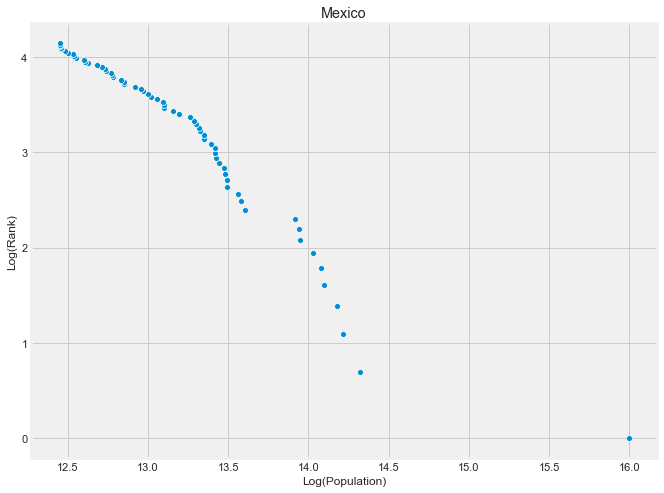

In [11]:
plt.figure(figsize =(10,8))
sns.scatterplot(y = np.log(df['Rank']),x = np.log(df['Size']))
plt.ylabel('Log(Rank)')
plt.xlabel('Log(Population)')
plt.title('Mexico')
plt.show()

In [12]:
beta, alpha = np.polyfit(x = np.log(df['Size']) , y = np.log(df['Rank']) ,deg = 1)

In [13]:
beta

-1.3965973184495781

In [14]:
alpha

21.62818869362944

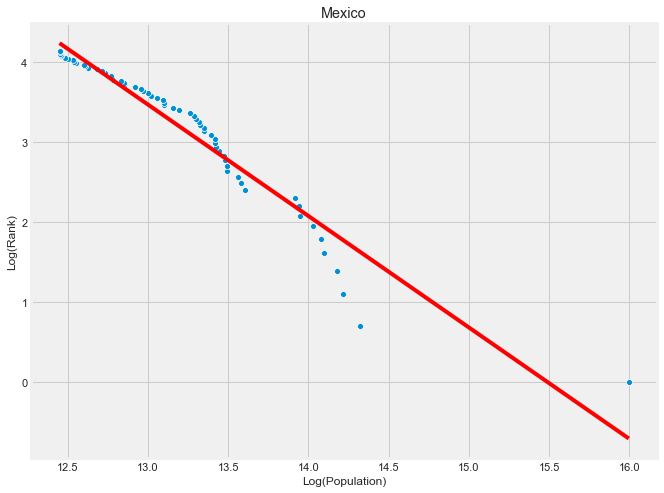

In [16]:
plt.figure(figsize =(10,8))
sns.scatterplot(y = np.log(df['Rank']),x = np.log(df['Size']))
sns.lineplot(x = np.log(df['Size']), y = alpha + np.log(df['Size'])*beta, color = 'red')
plt.ylabel('Log(Rank)')
plt.xlabel('Log(Size)')
plt.title('Mexico')
plt.show()

In [17]:
beta_mex = beta
alpha_mex = alpha
print(beta_mex, alpha_mex)

-1.3965973184495781 21.62818869362944


So, we see a relation:
$$
\ln(\text{Rank}) = 21.63 - 1.40\ln(\text{Size}) \,,
$$

# =======================================================

## Power Law in US Cities

We take or data from http://worldpopulationreview.com/countries/united-states-population/cities/ and use data from the 2010 census.

In [4]:
df = pd.read_csv('data_USA.csv')
df.head()

,asciiname,population,location
0,New York City,8175133,"https://www.google.com/maps/?q=40.71427,-74.00597"
1,Los Angeles,3971883,"https://www.google.com/maps/?q=34.05223,-118.2..."
2,Chicago,2720546,"https://www.google.com/maps/?q=41.85003,-87.65005"
3,Brooklyn,2300664,"https://www.google.com/maps/?q=40.6501,-73.94958"
4,Houston,2296224,"https://www.google.com/maps/?q=29.76328,-95.36327"


In [5]:
df.drop(columns=['location','asciiname'],inplace=True)
df['Size'] = pd.to_numeric(df['population'])
df.drop('population', axis = 1, inplace = True)
df = df[df['Size']>250000]
df['Rank'] = df.index+ 1

In [10]:
df.head()

,Size,Rank
0,8175133,1
1,3971883,2
2,2720546,3
3,2300664,4
4,2296224,5


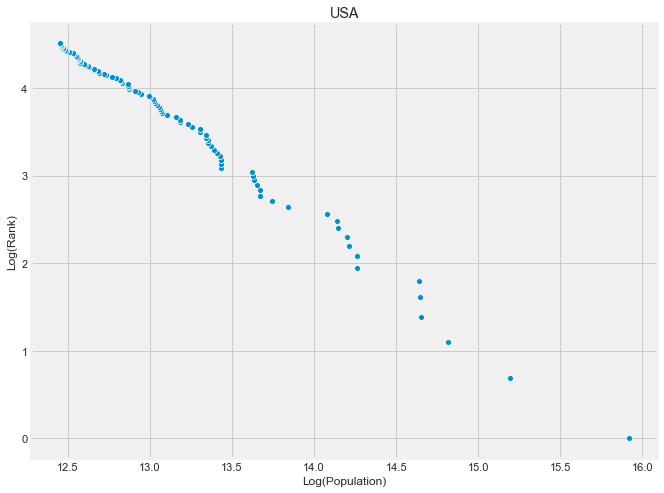

In [11]:
plt.figure(figsize =(10,8))
sns.scatterplot(y = np.log(df['Rank']),x = np.log(df['Size']))
plt.ylabel('Log(Rank)')
plt.xlabel('Log(Population)')
plt.title('USA')
plt.show()

In [12]:
beta, alpha = np.polyfit(x = np.log(df['Size']) , y = np.log(df['Rank']) ,deg = 1)
print(beta, alpha)

-1.3290666116996512 21.08203783599572


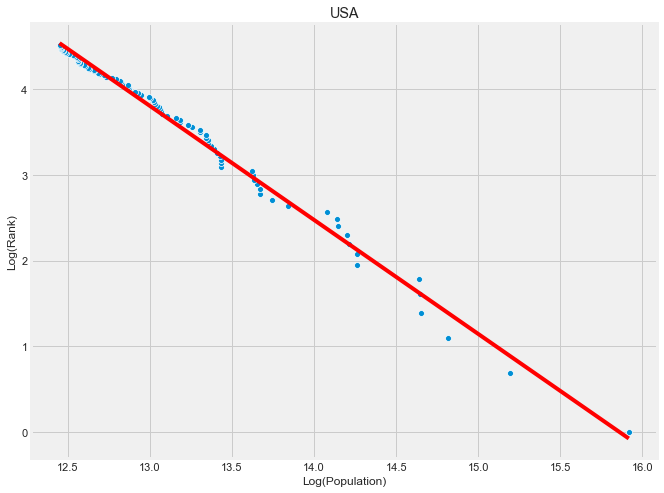

In [13]:
plt.figure(figsize =(10,8))
sns.scatterplot(y = np.log(df['Rank']),x = np.log(df['Size']))
sns.lineplot(x = np.log(df['Size']), y = alpha + np.log(df['Size'])*beta, color = 'red')
plt.ylabel('Log(Rank)')
plt.xlabel('Log(Population)')
plt.title('USA')
plt.show()

So, we see a relation:
$$
\ln(\text{Rank}) = 21.08- 1.33\ln(\text{Size})\,,
$$
which is remarkably close to the Mexican case.